## Install packages

In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -r requirements.txt

## Import libraries and set the path of the files

In [ ]:
''' Set the path where the folder of this files are located'''
path = ''

In [1]:
import numpy as np
from numpy import linalg
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import plotly.express as px
import json
import plotly.express as px
import scipy.io
from sklearn import datasets
import io
from activation_functions import activation_function
from activation_functions import phi_derivate
from errors_and_energy import calculate_error
from errors_and_energy import calculate_energy
from errors_and_energy import calculate_mean_energy
from train_neural_network import network_training
from retropropagation import backpropagation
from sampling import shuffled_sampling
from propagation import weight_initialization
from propagation import  propagation_function
from plotting import plot_gradients, plot_errors, plot_energy
import itertools

## Set Parameters

In [2]:
# Parameters

# path = 'C:\\Users\\PIRLO\\Documents\\Neural Network\\'

n_train = 0.6
n_val = 0.4
activation = 'sigmoid'
epocas_max = 50
tol = 0.01

# Load data
movies_df = pd.read_csv(path+'data\\movies_industry_oscars.csv', index_col=0)
            

# Sampling
train_data, test_data, val_data = shuffled_sampling(movies_df, n_train, n_val)

x_train = np.matrix(train_data.iloc[:, 0:8])
y_train = np.matrix(train_data.iloc[:, 8]).T

x_test = np.matrix(test_data.iloc[:, 0:8])
y_test = np.matrix(test_data.iloc[:, 8]).T

# Variacion capas ocultas
N_patrones = x_train.shape[0]
n_inputs = x_train.shape[1]
n_out = y_train.shape[1]

comb = []
comb.append([p for p in itertools.product([1,2,3,4,5], repeat=1)])
comb.append([p for p in itertools.product([1,2,3,4,5], repeat=2)])
comb.append([p for p in itertools.product([1,2,3,4,5], repeat=3)])

## Main

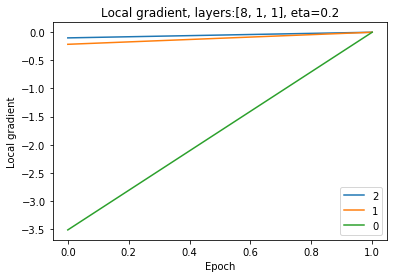

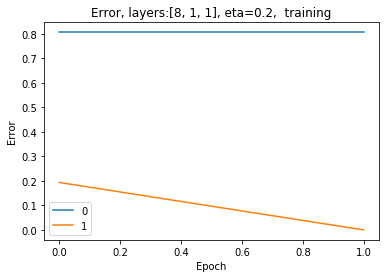

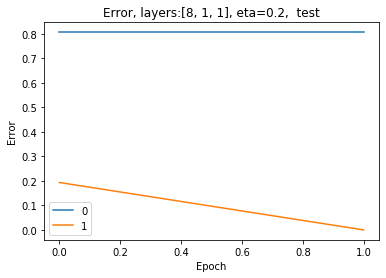

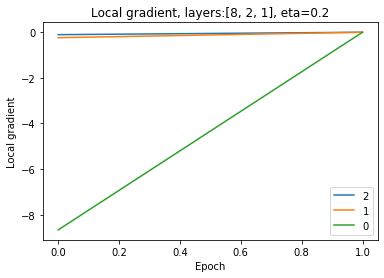

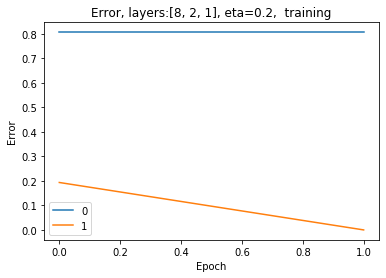

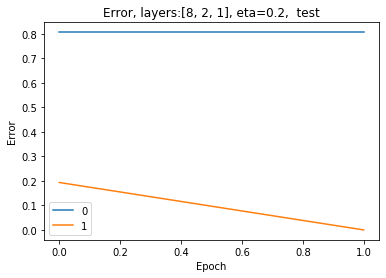

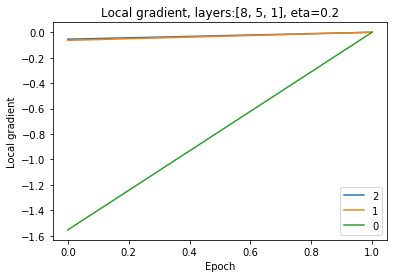

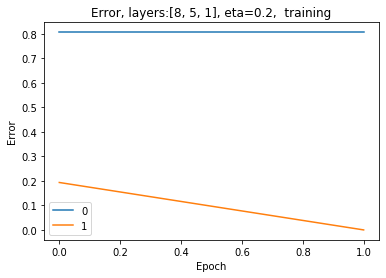

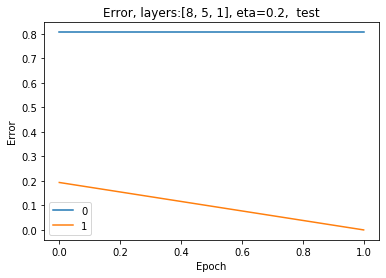

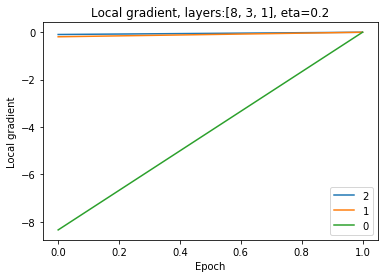

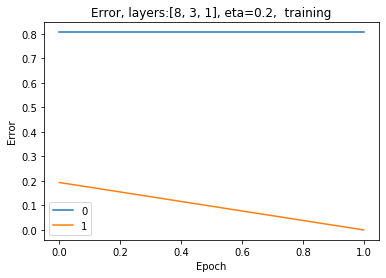

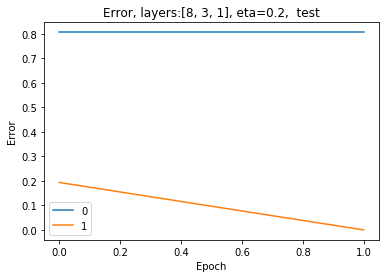

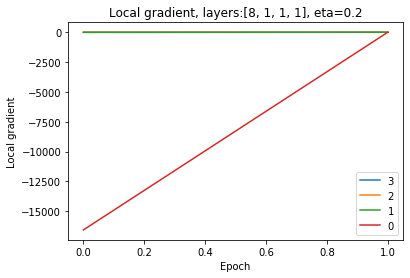

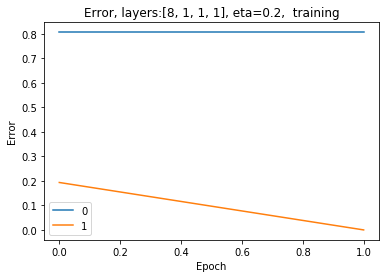

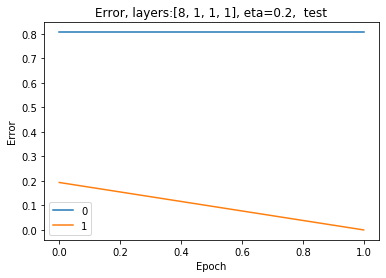

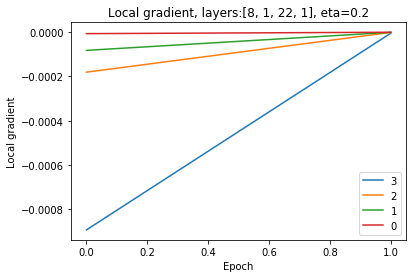

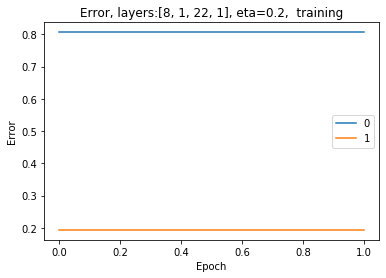

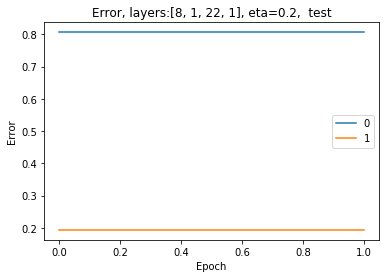

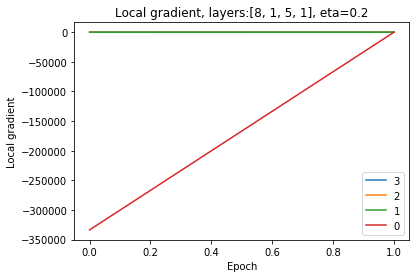

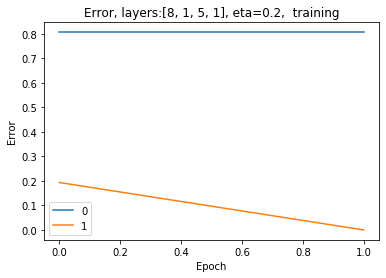

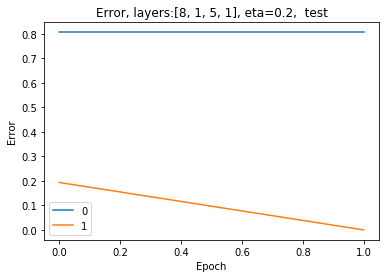

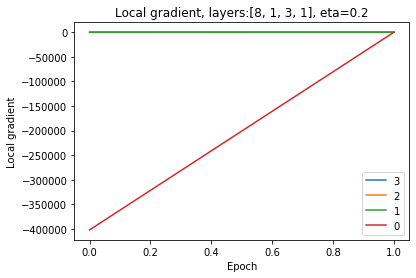

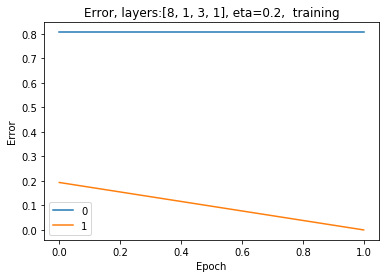

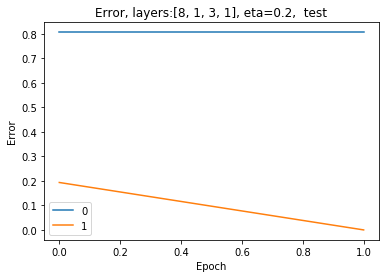

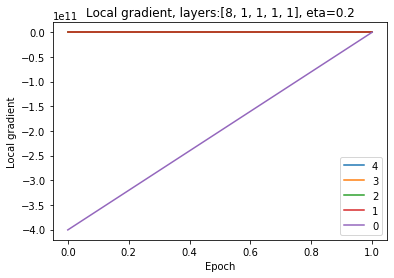

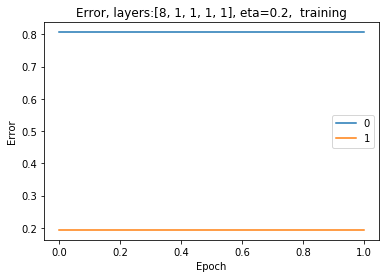

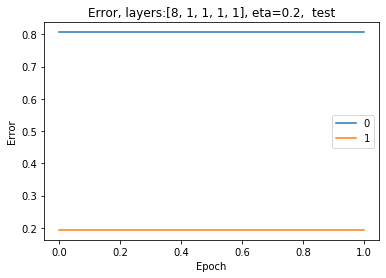

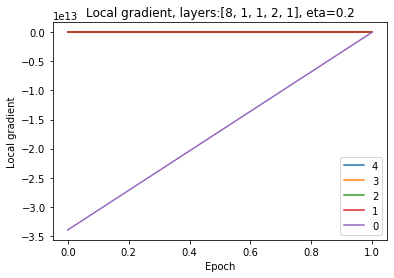

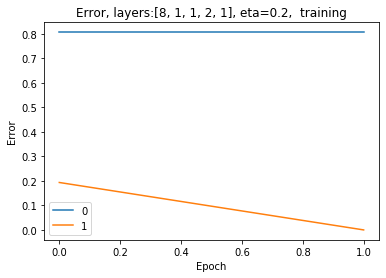

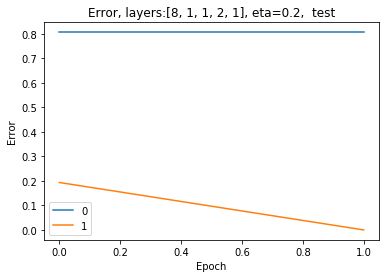

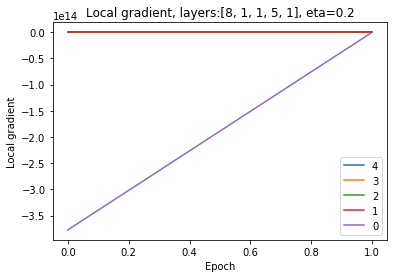

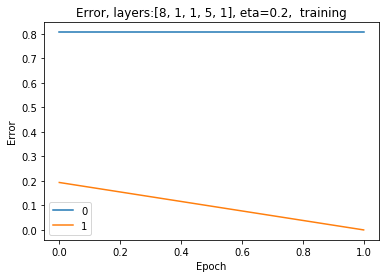

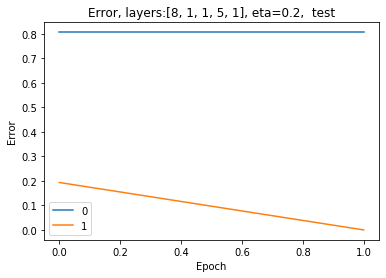

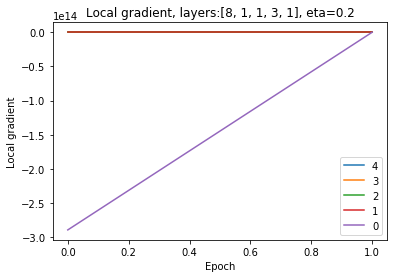

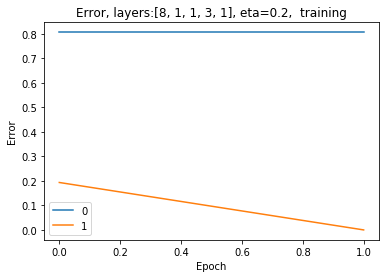

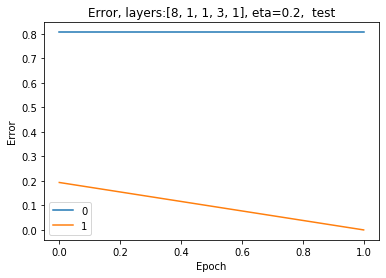

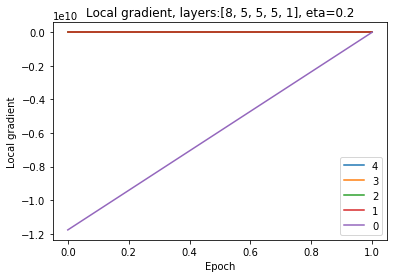

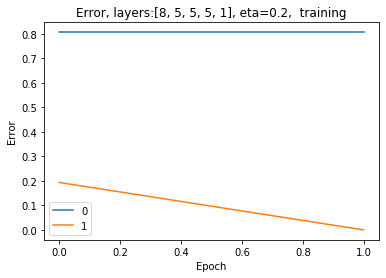

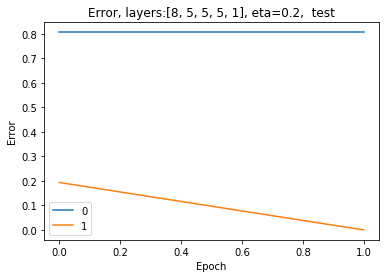

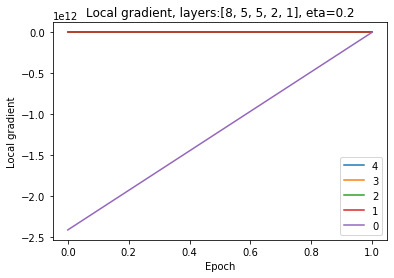

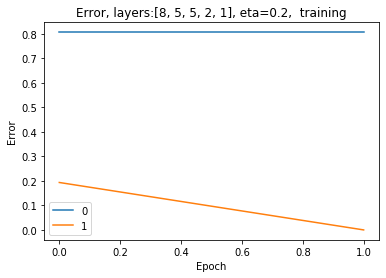

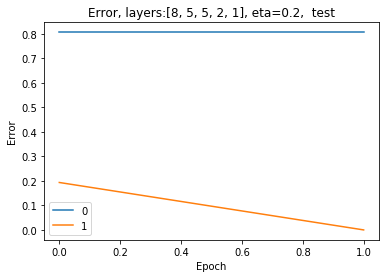

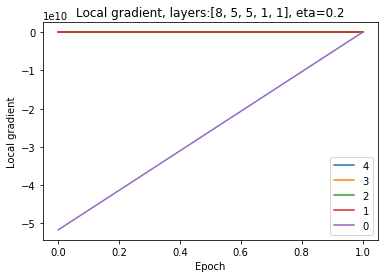

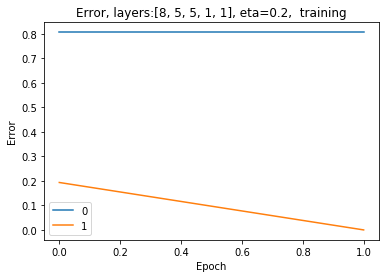

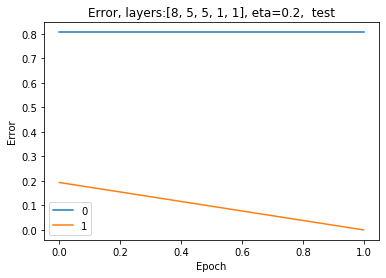

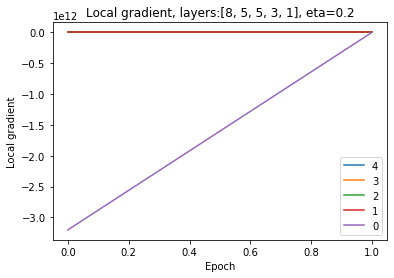

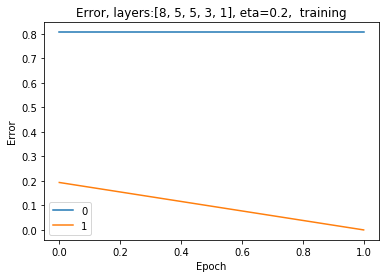

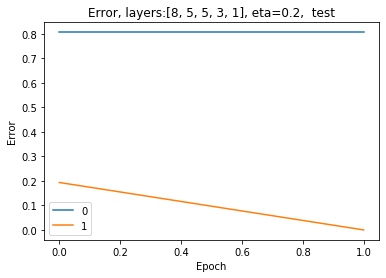

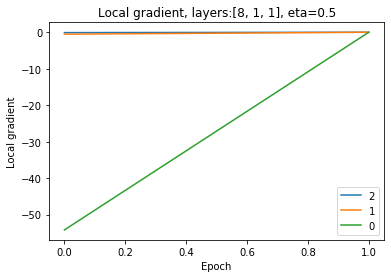

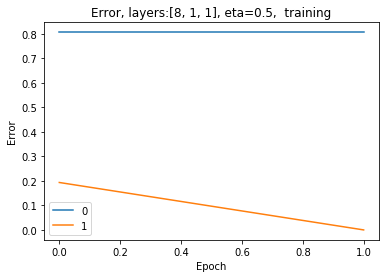

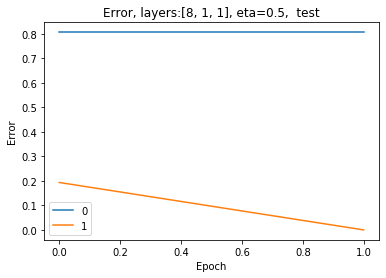

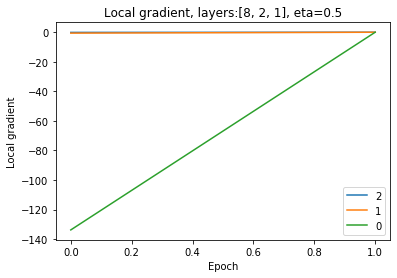

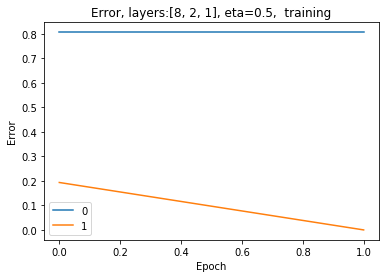

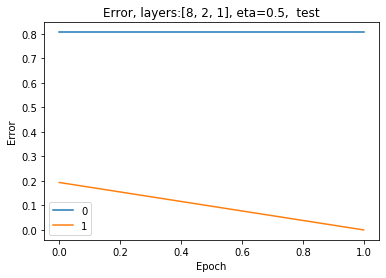

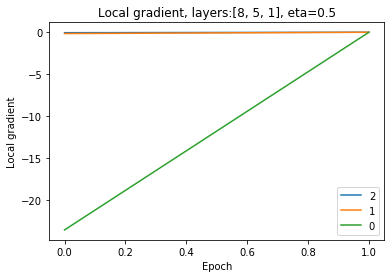

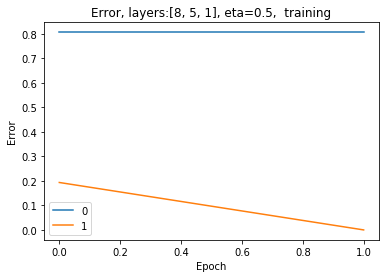

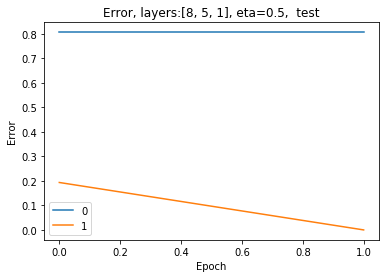

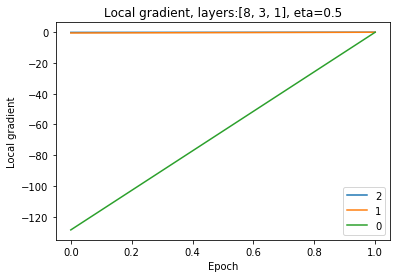

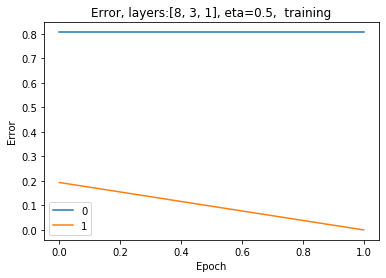

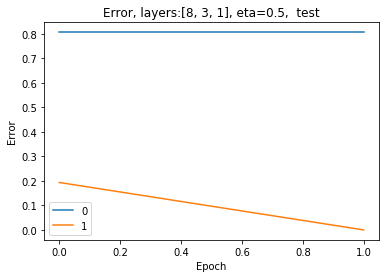

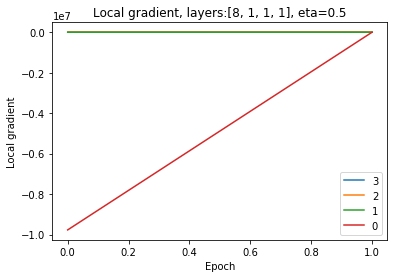

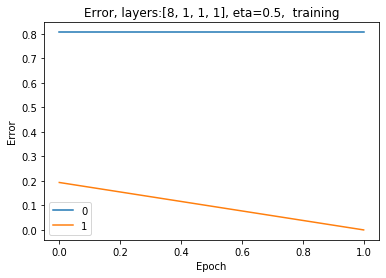

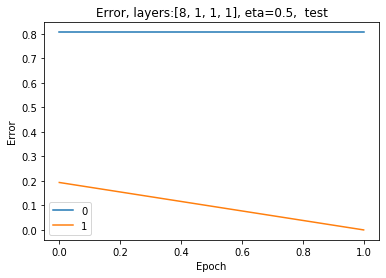

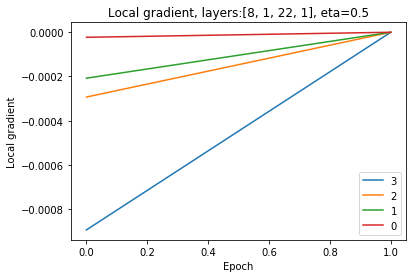

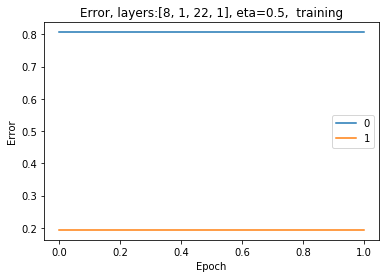

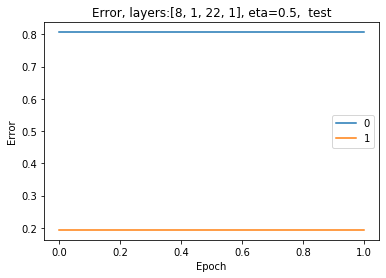

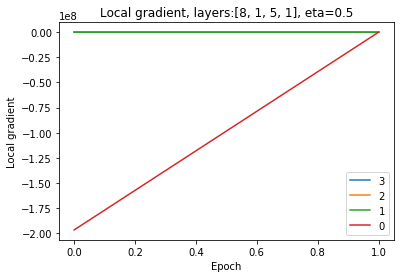

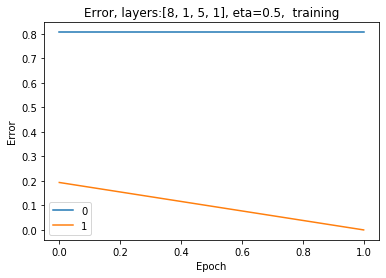

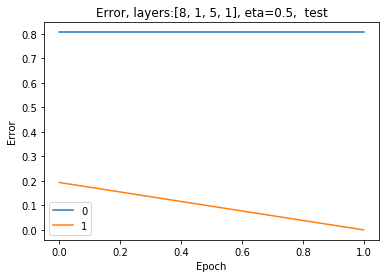

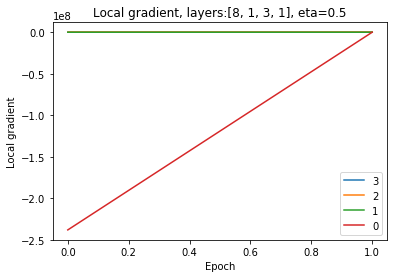

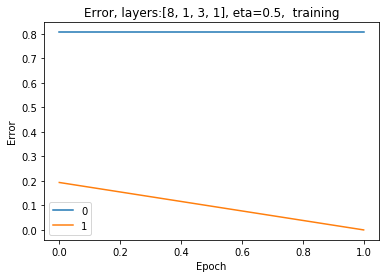

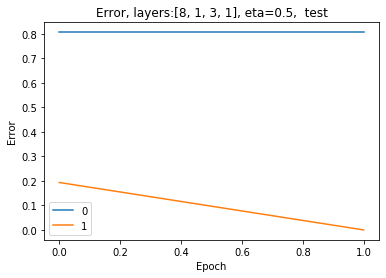

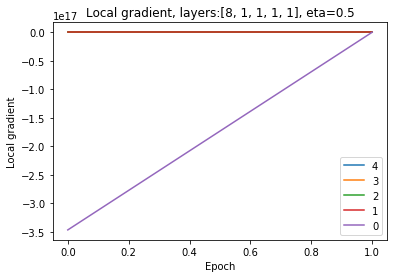

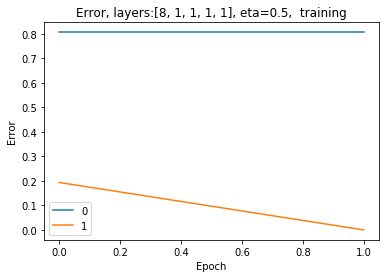

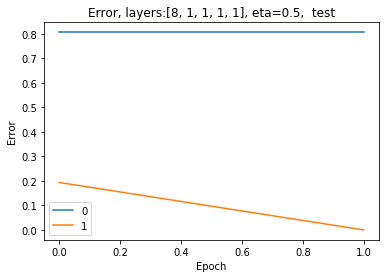

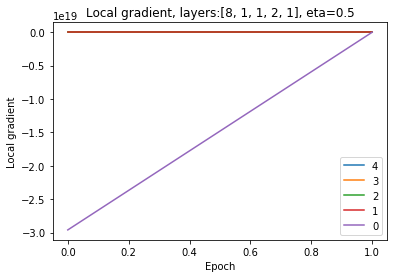

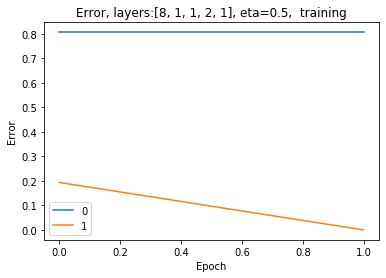

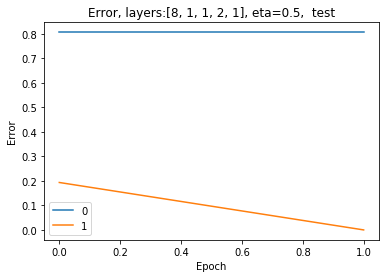

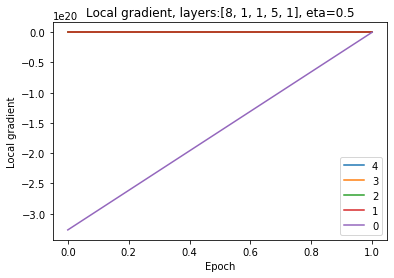

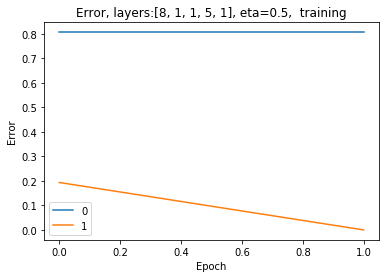

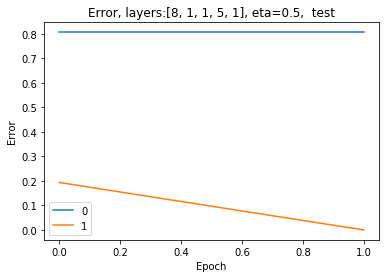

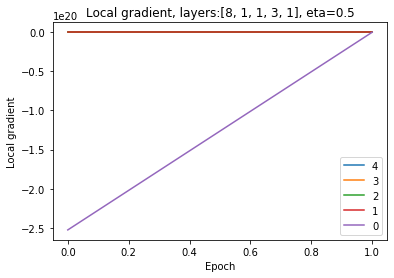

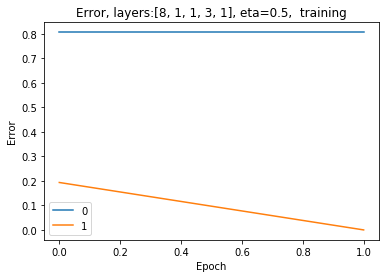

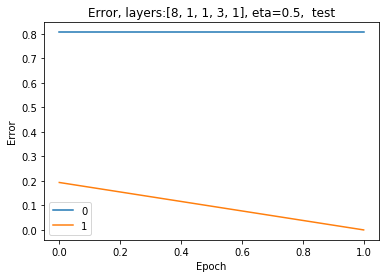

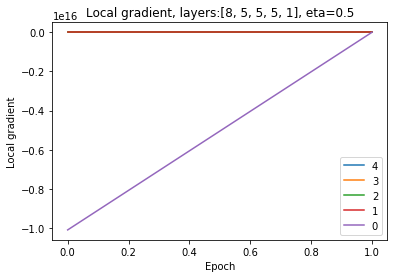

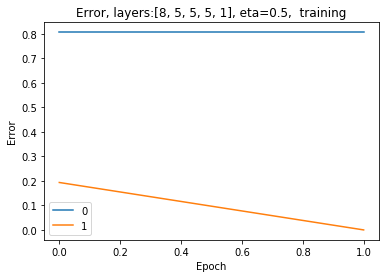

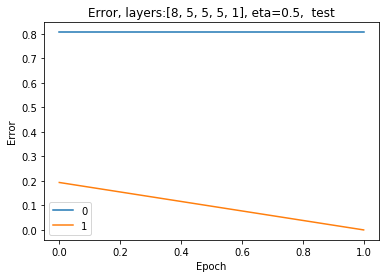

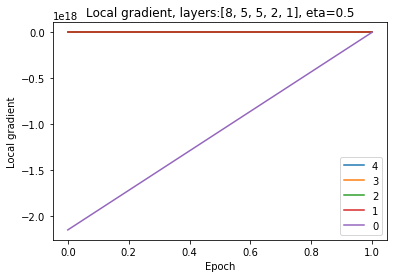

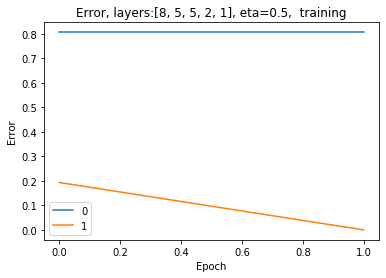

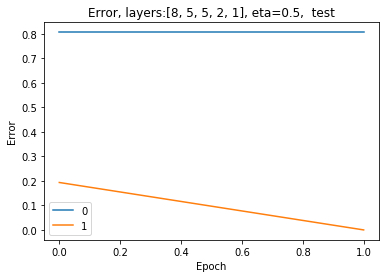

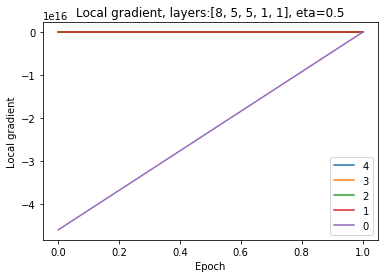

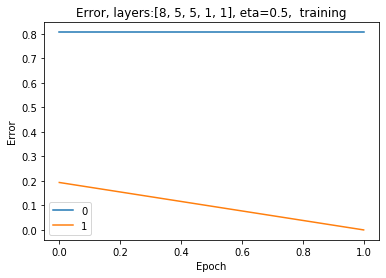

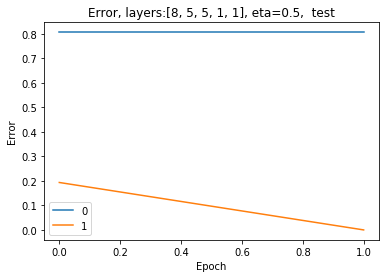

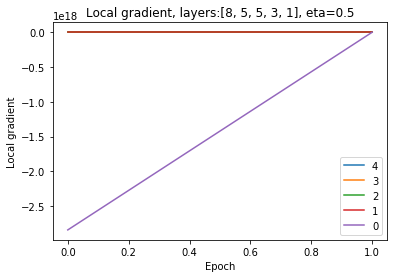

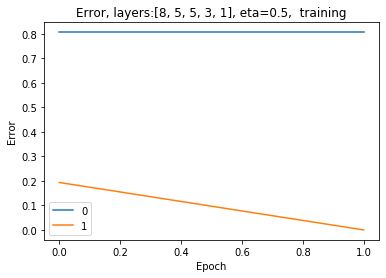

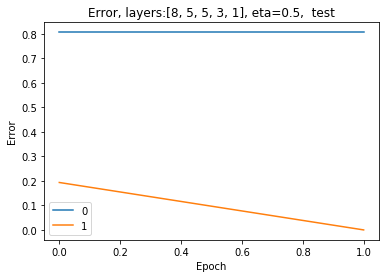

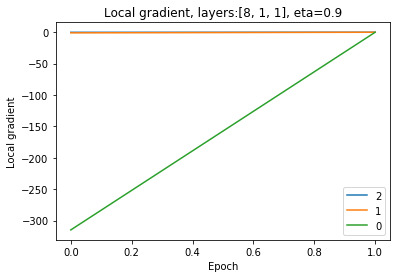

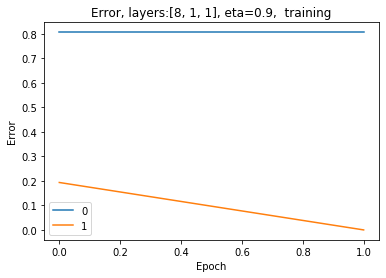

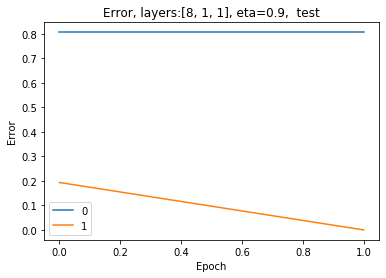

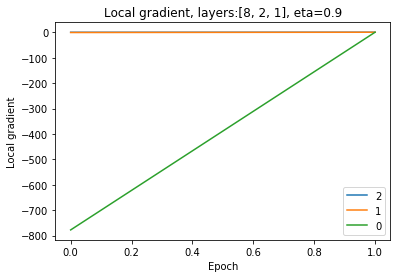

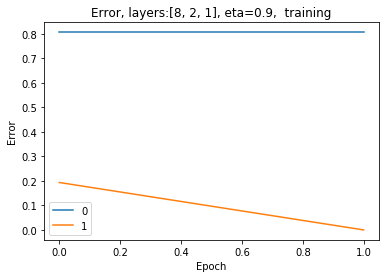

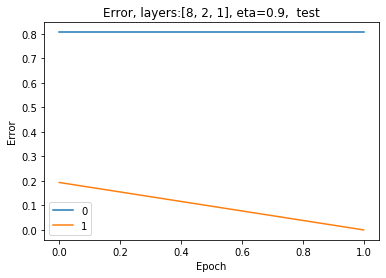

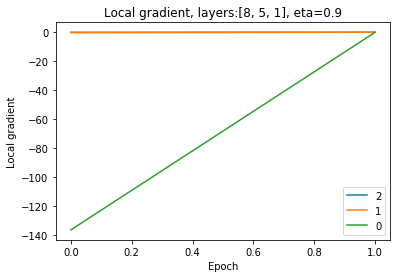

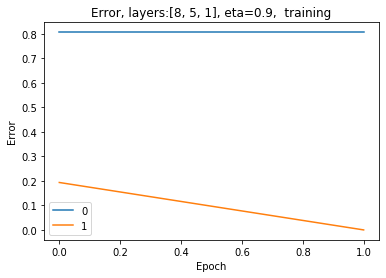

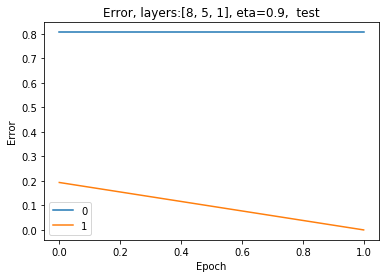

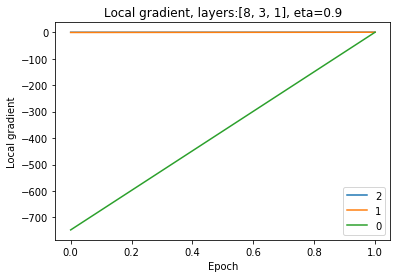

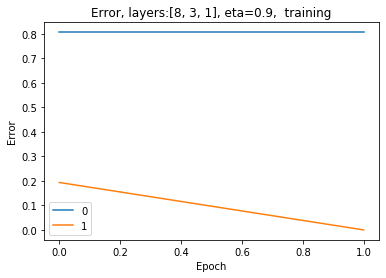

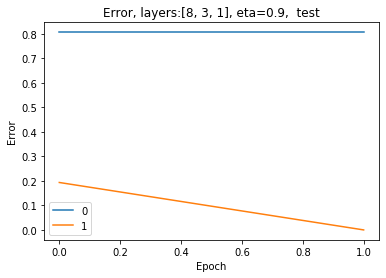

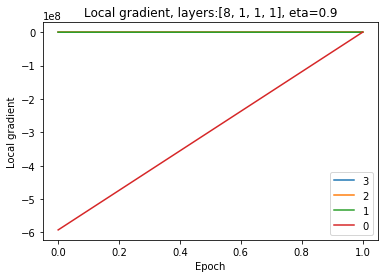

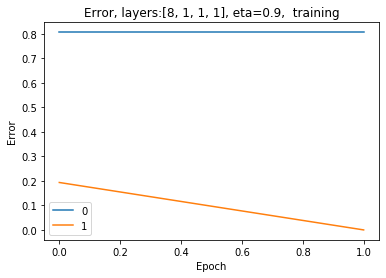

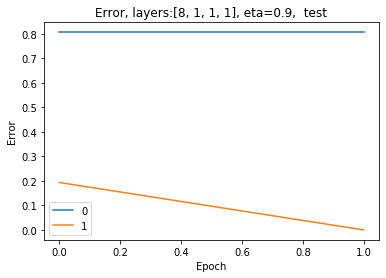

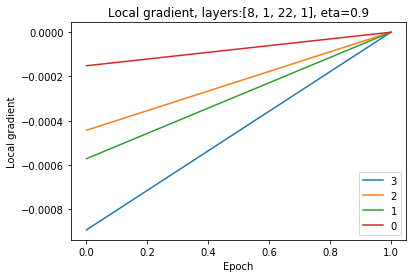

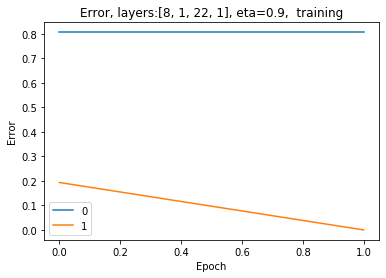

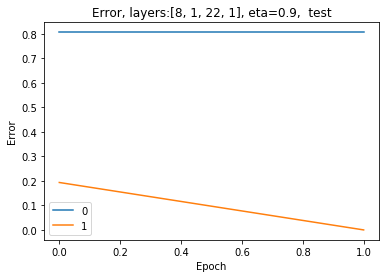

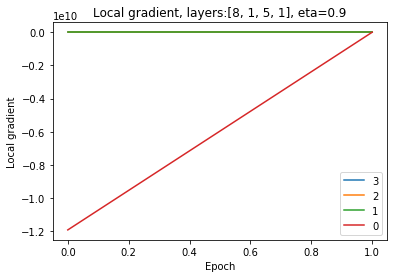

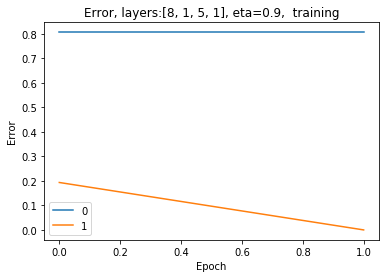

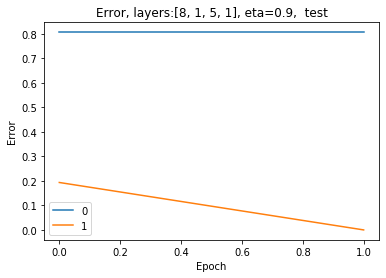

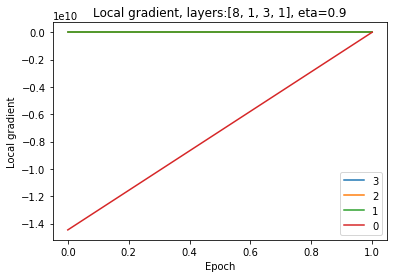

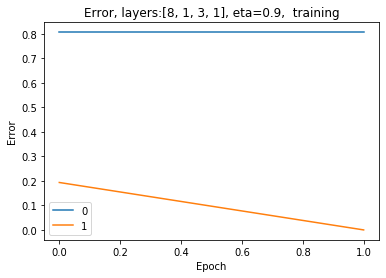

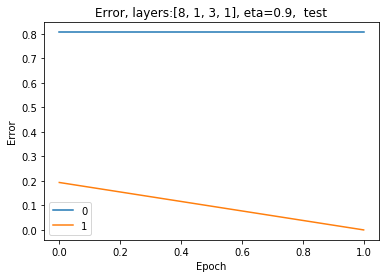

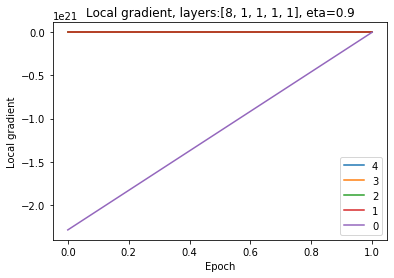

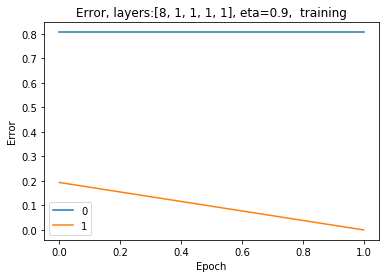

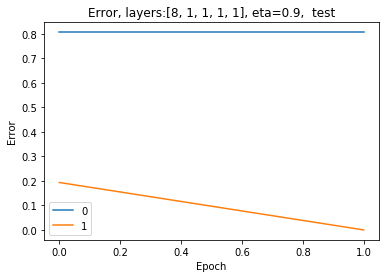

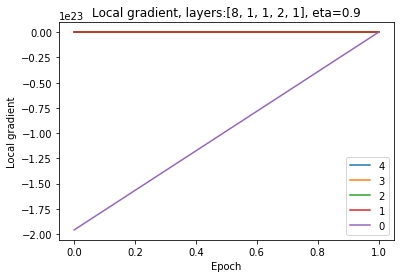

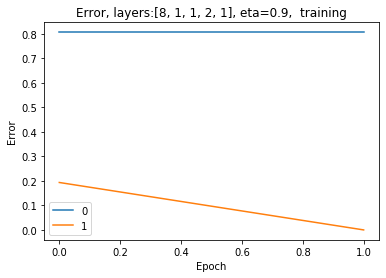

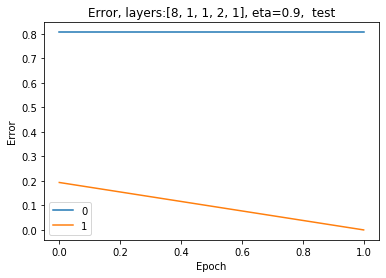

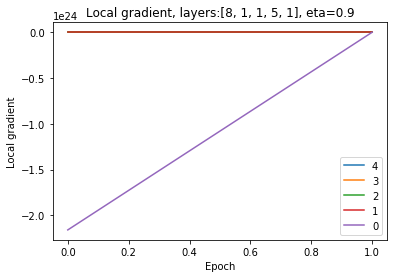

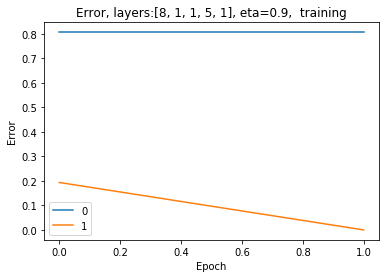

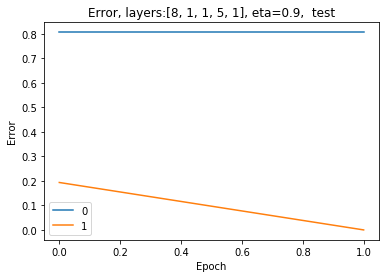

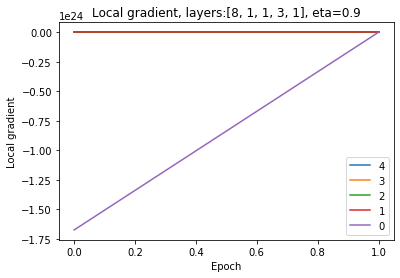

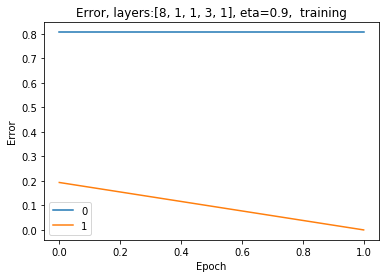

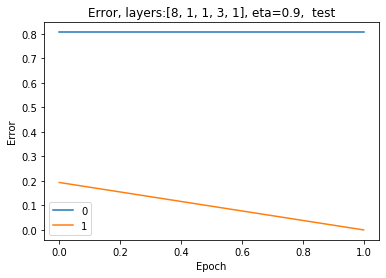

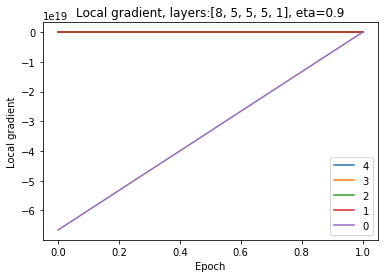

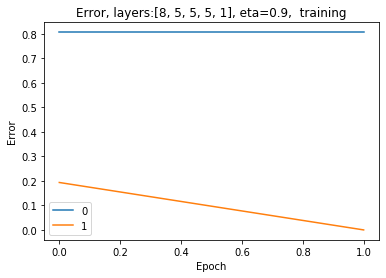

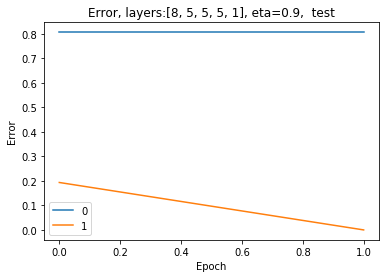

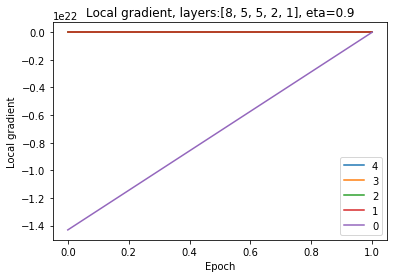

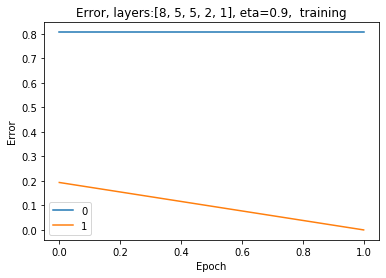

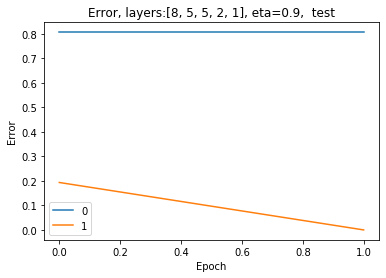

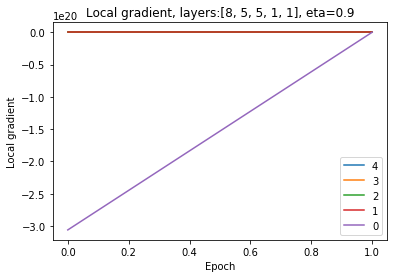

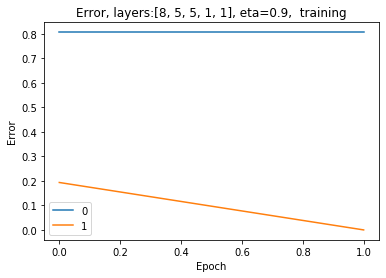

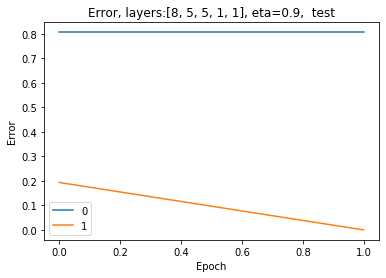

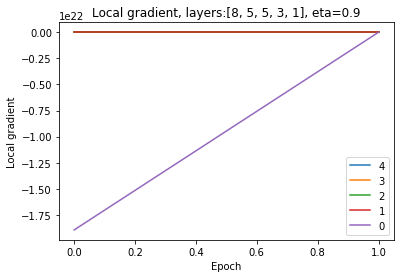

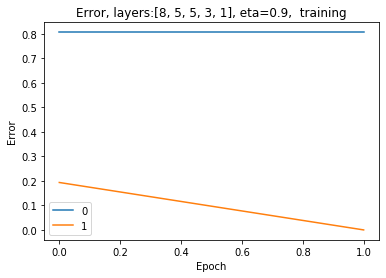

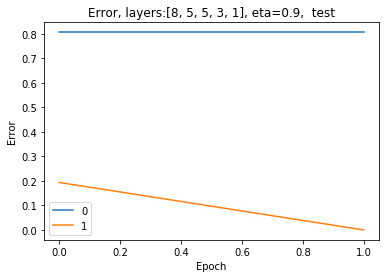

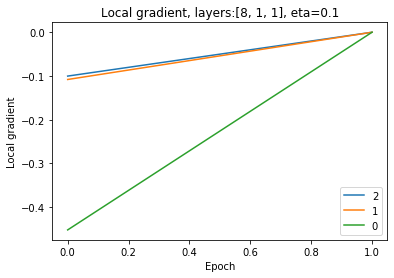

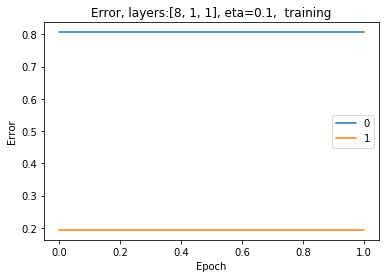

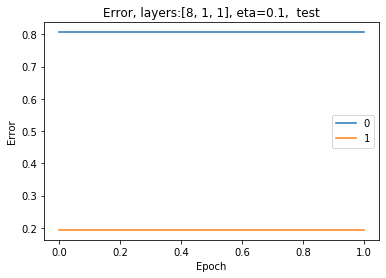

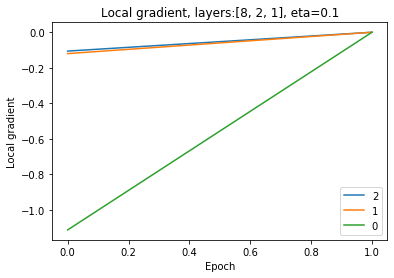

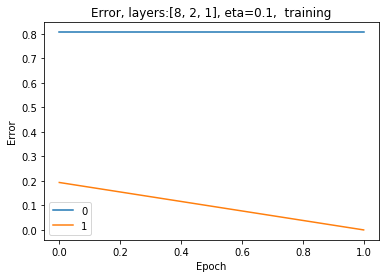

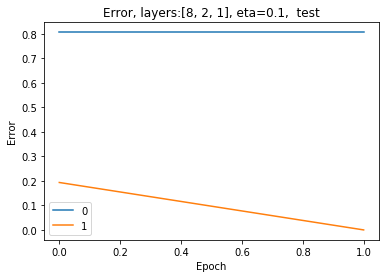

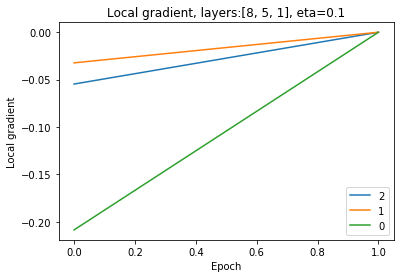

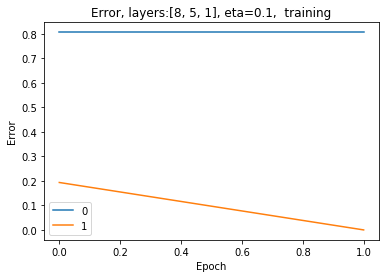

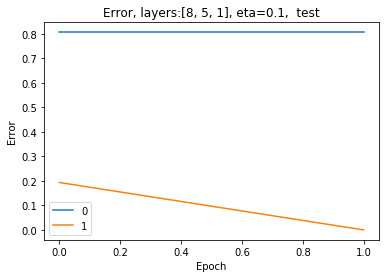

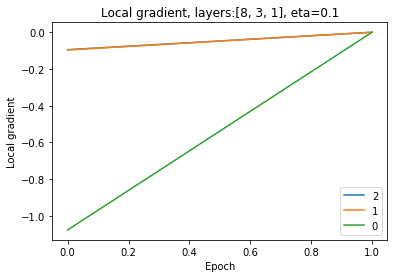

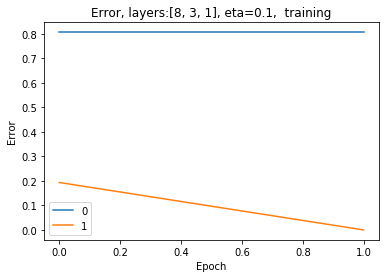

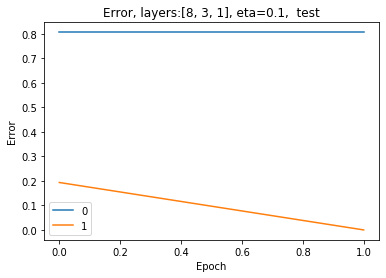

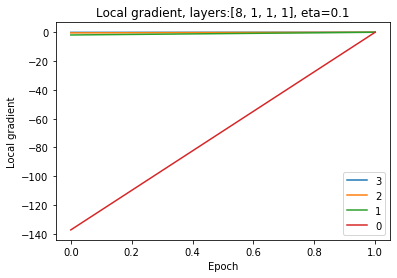

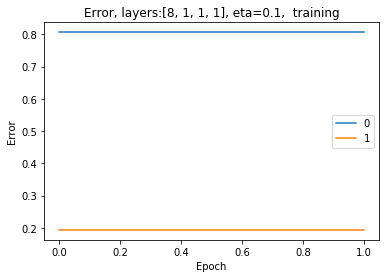

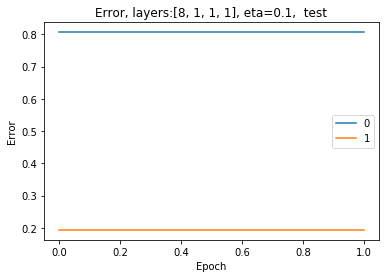

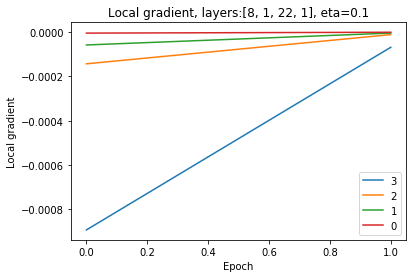

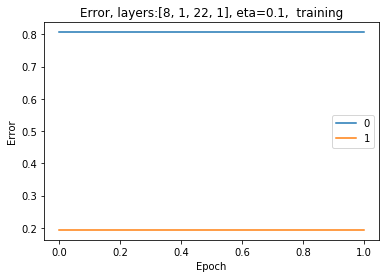

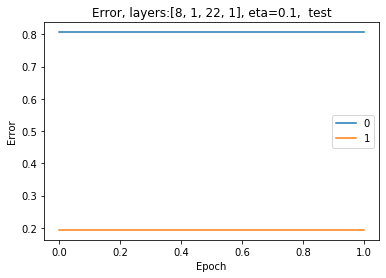

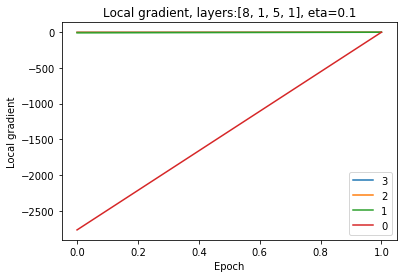

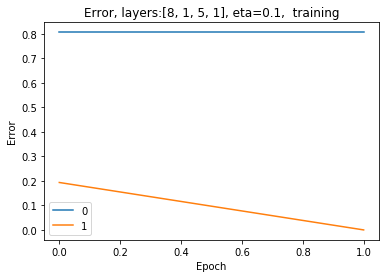

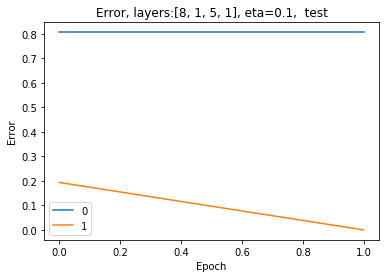

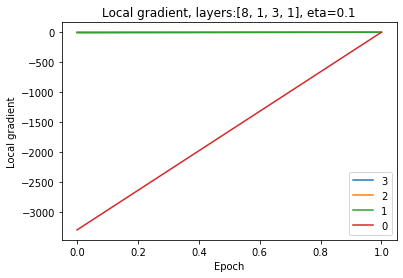

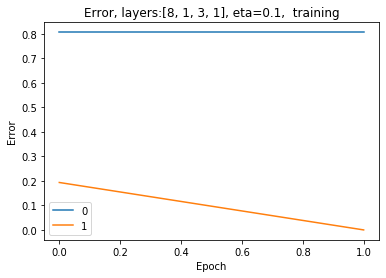

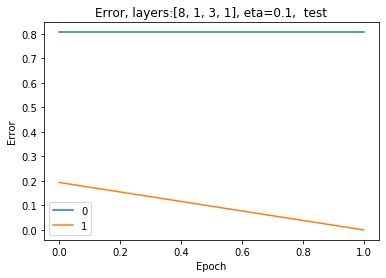

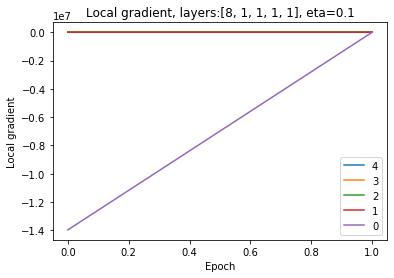

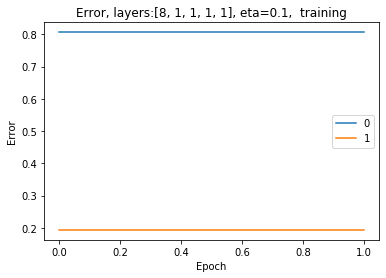

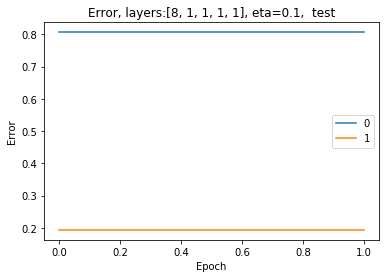

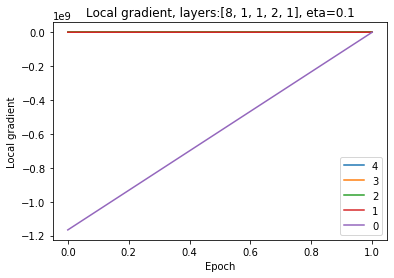

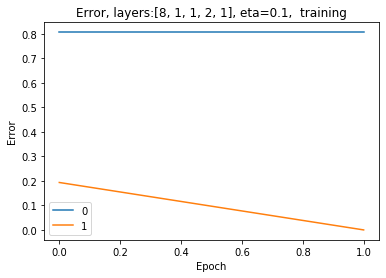

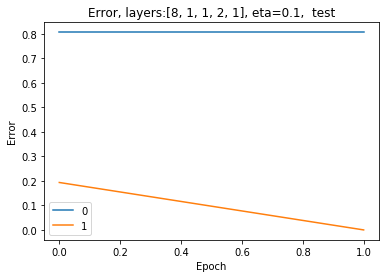

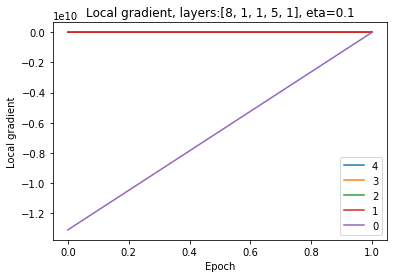

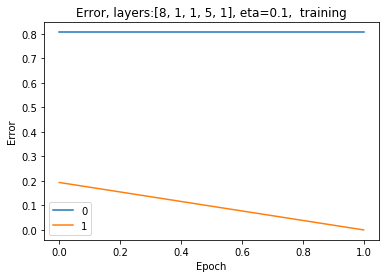

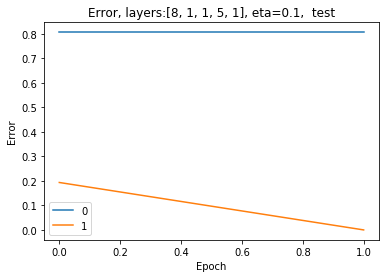

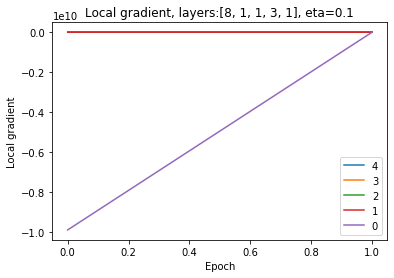

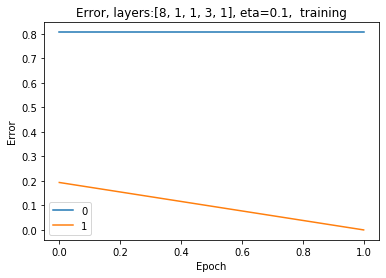

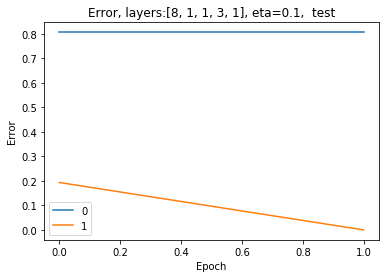

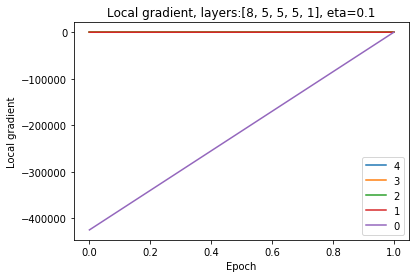

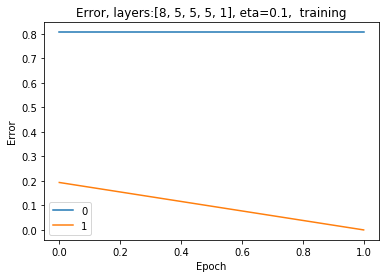

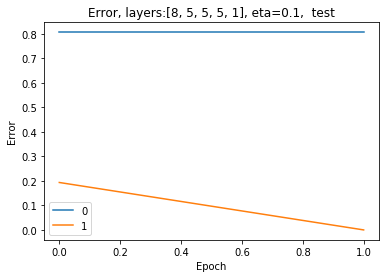

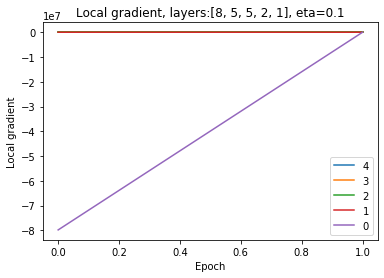

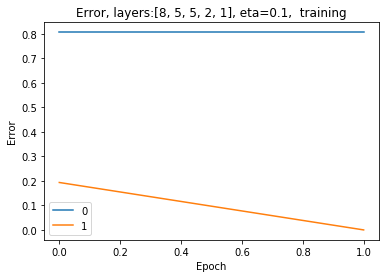

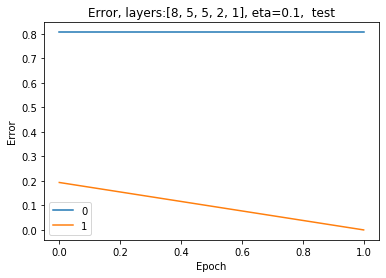

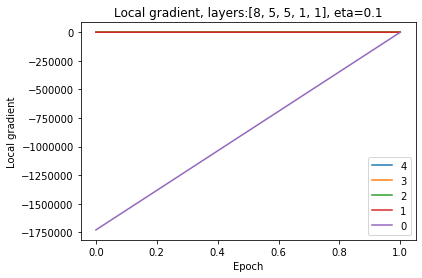

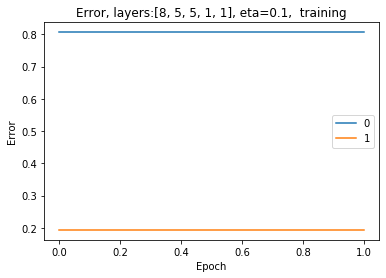

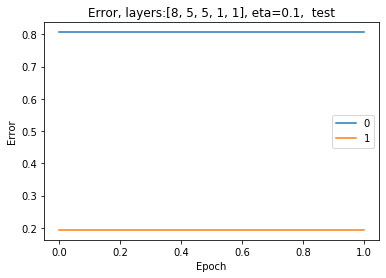

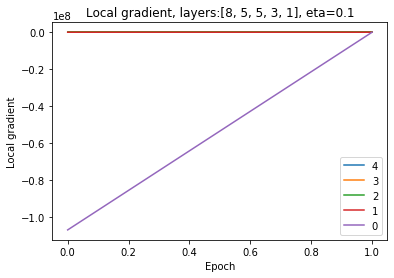

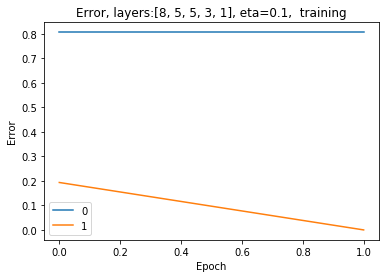

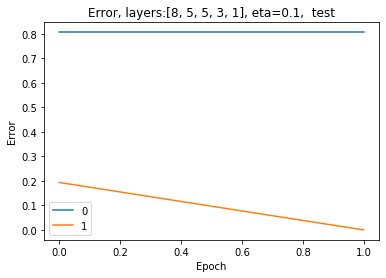

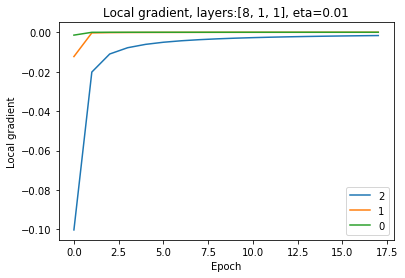

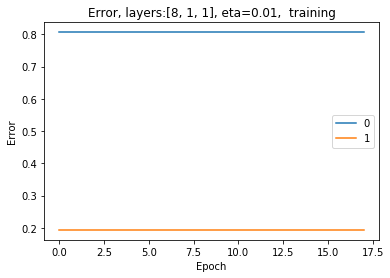

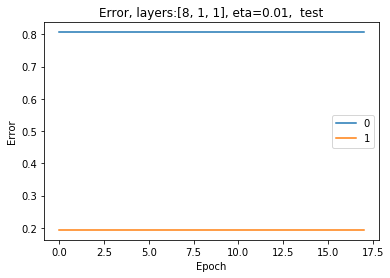

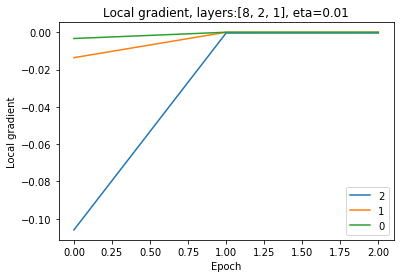

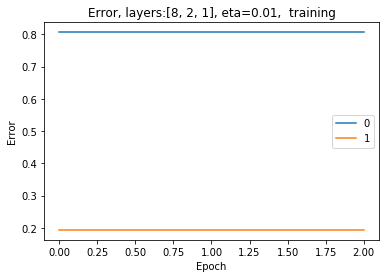

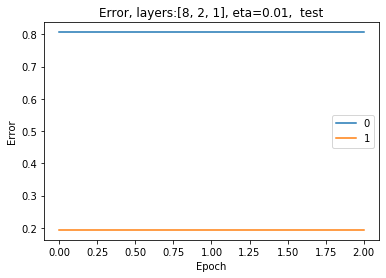

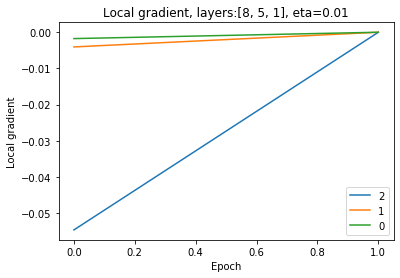

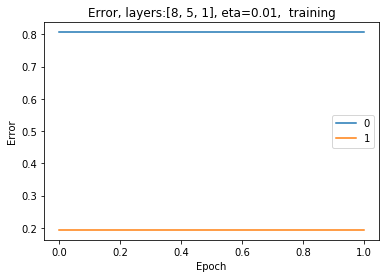

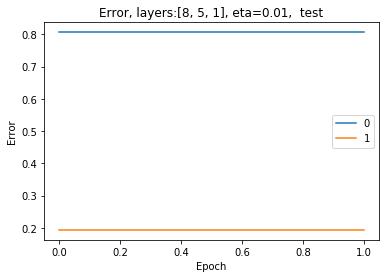

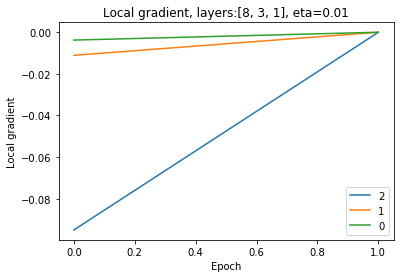

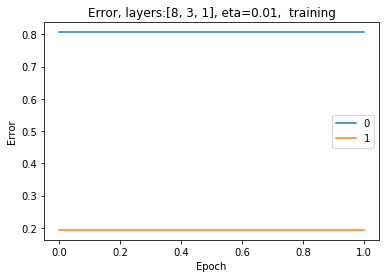

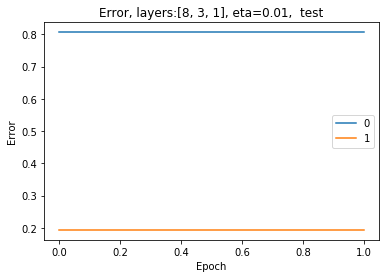

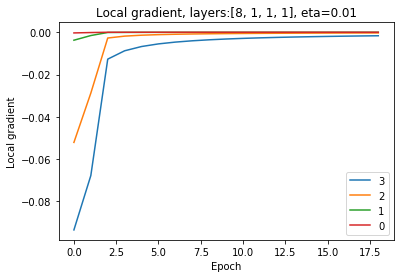

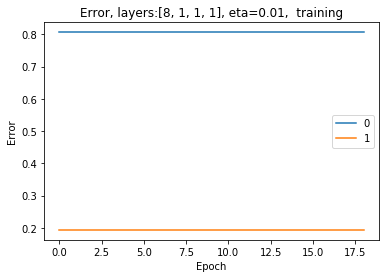

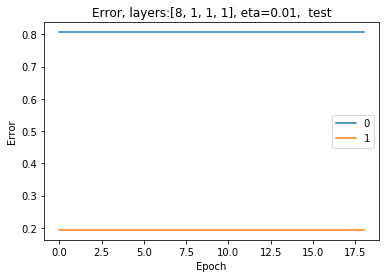

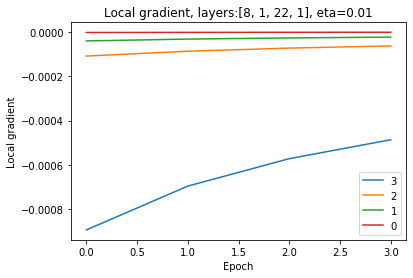

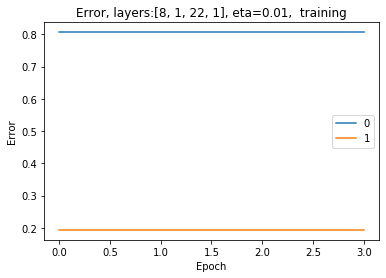

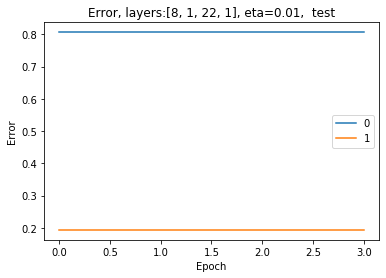

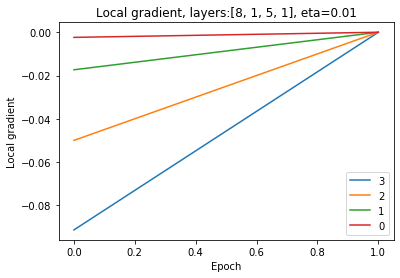

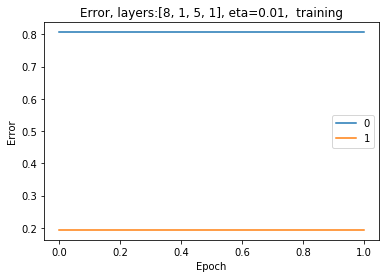

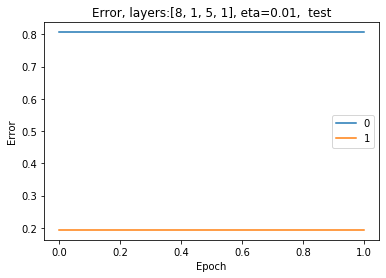

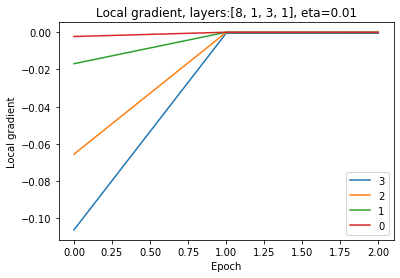

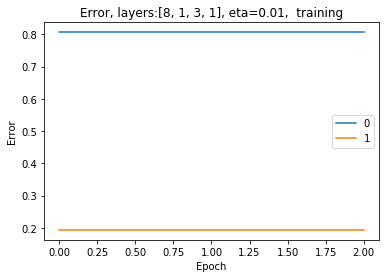

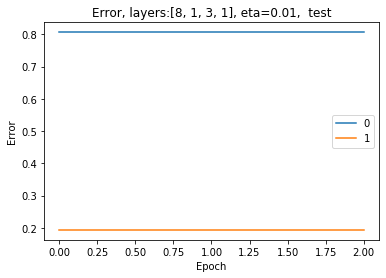

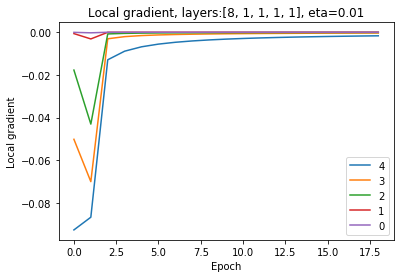

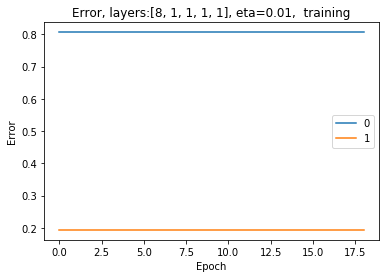

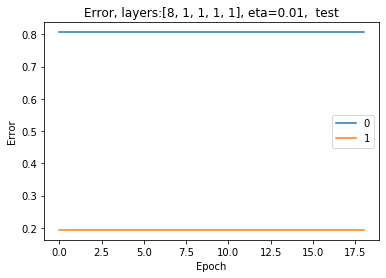

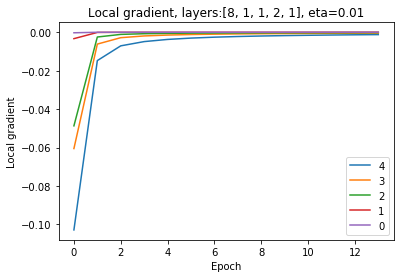

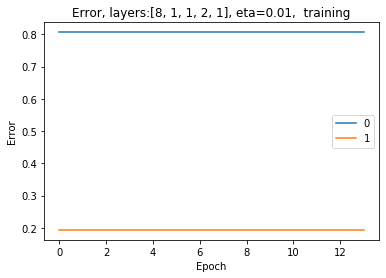

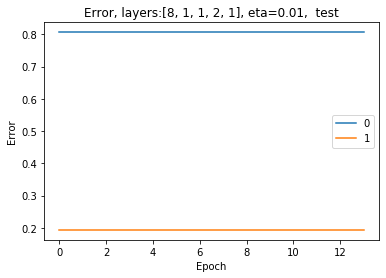

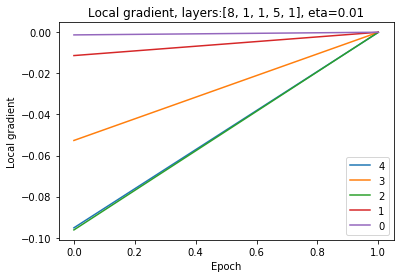

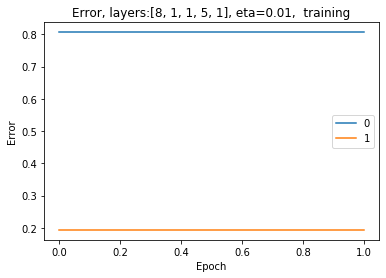

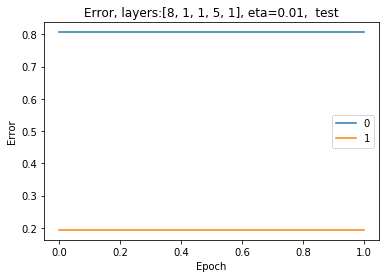

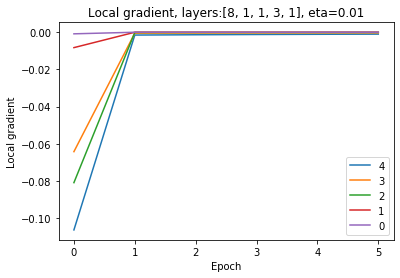

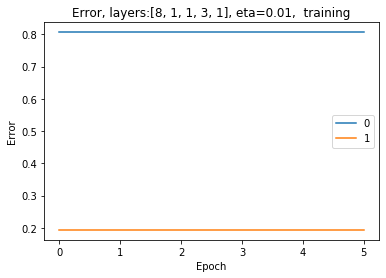

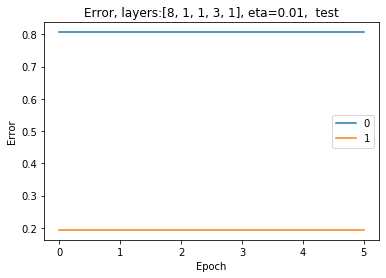

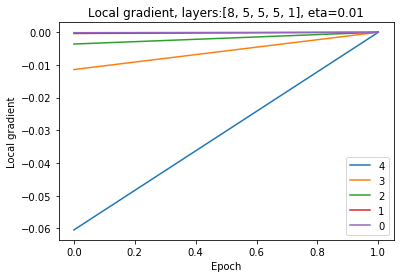

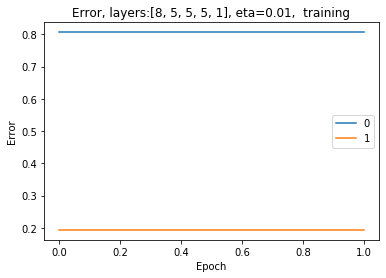

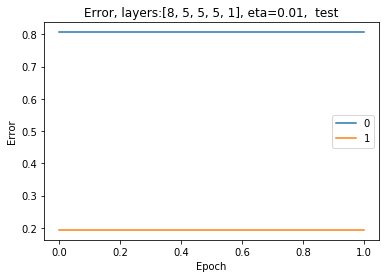

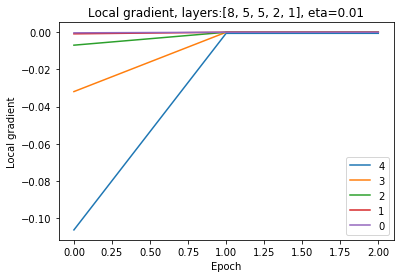

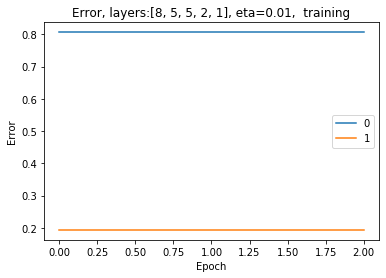

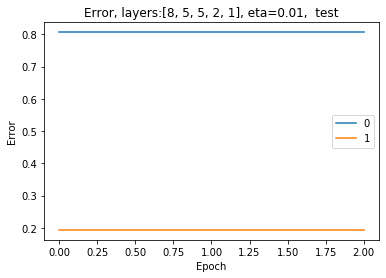

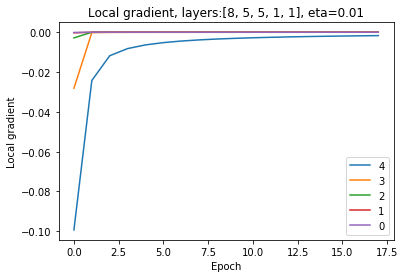

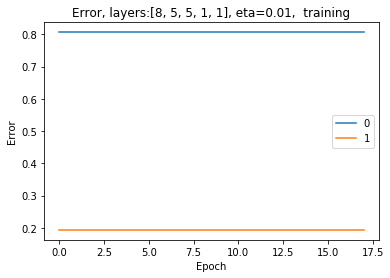

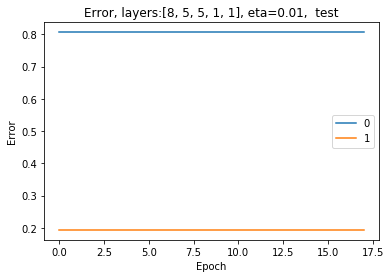

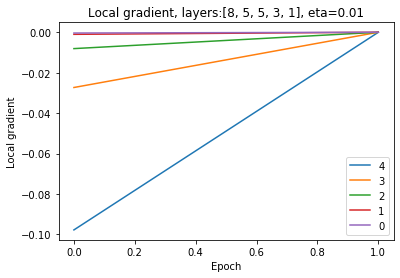

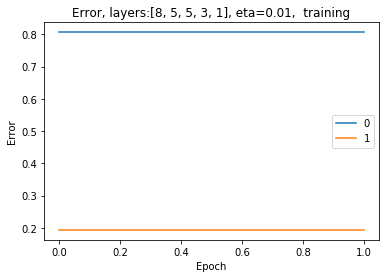

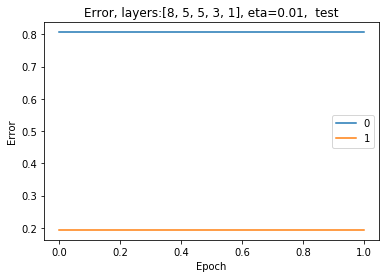

In [4]:
ECM = {}
for eta in [0.2, 0.5, 0.9, 0.1, 0.01]:
    for L in comb:
        for l in L:
            layers = [n_inputs]
            [layers.append(n) for n in l]
            layers.append(n_out)

            # Training
            local_gradient, y_layers, errors, W, energies = network_training(x_train, y_train, n_inputs, layers, eta, activation, epocas_max, N_patrones, tol)
            plot_gradients(layers, local_gradient, eta, path)
            # plot_errors(errors, layers, eta, path,' training')
            plot_energy(energies, layers, eta, path, ' training')

            # Testing
            y_layers, v_layers = propagation_function(W, x_test, activation)
            e = calculate_error(y_test, y_layers[len(y_layers)-1])

            ecm = np.mean(np.power(e,2))

            ECM[eta, str(layers)] = ecm
            plot_errors(errors, layers, eta, path, ' test')
            # plot_energy(energies, layers, eta, path, ' test')

ECM = pd.DataFrame(ECM, index=['ECM']).T
ECM.to_excel(path+'results\\ECM_test.xlsx')